**LearnPy: Python for Data Analytics**

- Author : Team Algoritma
- Developed by Algoritma's product division and instructors team
___

# Reshaping, Group By Aggregation, and Pandas Visualization

Pada bagian ini Anda akan diperkenalkan dengan struktur dataframe MultiIndex dan bagaimana cara untuk melakukan reshaping sebuah dataframe. Selain itu, Anda akan diperkenalkan dengan salah satu metode untuk melakukan agregasi yaitu `groupby()`. Method groupby ini memiliki beberapa kesamaan dengan method `crosstab()` dan `pivot_table()`, akan tetapi groupby memiliki kelebihan dimana dataframe hasil agregasinya akan lebih rapi(tidy) dibandingkan `crosstab()` maupun `pivot_table()`. 

Pada akhir pembahasan pada learnPy ini akan terdapat beberapa latihan dalam membuat visualisasi menggunakan method `plot()`. 

## Reshaping 
Reshaping merupakan sebuah teknik untuk mengubah bentuk data yang kita punya. Jika Anda pernah mengenal istilah dataframe dengan bentuk wide format dan long format, disinilah letak reshaping akan dibutuhkan. Lalu apa perbedaan di antara kedua bentuk data tersebut? Apakah ada kebutuhan khusus kapan kita bekerja dengan data yang memiliki bentuk wide maupun long format? Perhatikan contoh di bawah ini.

In [1]:
import pandas as pd

In [2]:
traffic = pd.read_pickle("data_input/traffic.pkl")
traffic.head()

Bounce Rate                           Sessions              \
Device Category     desktop     mobile     tablet      desktop      mobile   
Date                                                                         
2019-06-01        41.455099  64.462710  20.012573   337.921687  582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543  916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471  891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097  837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136  647.034091   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552

Data di atas merupakan data traffic sebuah website. Data tersebut dikumpulkan berdasarkan jenis device yaitu traffic pada desktop, mobile device, dan tablet. Analisis traffic website umum dilakukan dengan tujuan untuk mengevaluasi apakah website yang dibangun sudah sesuai dengan kebutuhan user/pengguna website. Selain itu, analisis traffic website diperlukan untuk melihat kekurangan dari website yang harus segera di perbaiki, mengukur efisiensi, dana melihat perubahan strategis yang dilakukan perusahaan. Dalam melakukan analisis terhadap traffic sebuah website, kita akan melihat beberapa parameter yang paling umum digunakan yaitu bounce rate, session, dan total visitor. 

* `Bounce Rate` adalah persentase pengunjung yang langsung meninggalkan website setelah membuka satu halaman saja [Google Analytics](https://support.google.com/analytics/answer/1009409?hl=id). Pendapat lain mengatakan bahwa bounce rate adalah keadaan dimana setelah pengunjung membuka sebuah halaman website, ia tidak melakukan tindakan apapun di halaman tersebut. Semakin tinggi nilai bounce rate menandakan ada yang salah dengan strategi website yang dijalankan. 

* `Session` adalah kumpulan interaksi pengguna dengan situs Anda dalam jangka waktu tertentu. 

In [3]:
traffic.shape

(30, 9)

### Stack 

Metode pertama yang dapat dilakukan untuk melakukan reshaping adalah stack. Metode ini mencoba untuk menggeser level sebuah kolom untuk membuat level baru pada indeksnya. Pada `pandas` Anda dapat menggunakan method `stack()`. Perhatikan contoh berikut:

In [3]:
traffic_stack = traffic.stack()
traffic_stack.head(9)

Bounce Rate    Sessions  Total Visitors
Date       Device Category                                         
2019-06-01 desktop            41.455099  337.921687      314.909639
           mobile             64.462710  582.246269      477.708955
           tablet             20.012573  115.878788      115.878788
2019-06-02 desktop            32.372644  320.876543      305.611111
           mobile             46.659636  916.636364      741.898990
           tablet             44.833929  132.492308      131.892308
2019-06-03 desktop            28.904192  821.010471      744.178010
           mobile             43.962397  891.817610      695.792453
           tablet             85.697323  270.419355      115.870968

Stack dapat mengubah bentuk sebuah datframe dari format wide ke format long. Secara default method `stack()` akan menggeser kolom yang levelnya adalah -1. Itu artinya kolom yang memiliki level paling dalam yang akan tergeser membentuk level baru pada indeksnya. Analisis dengan bentuk dataframe seperti ini (long format) sangat membantu jika kita ingin membandingkan parameter evaluasi website dari ketiga device per masing-masing tanggal. Bagaimana jika kita ingin mengembalikannya ke bentuk dataframe awal? 

### Unstack

Pada bagian sebelumnya, kita telah mencoba untuk mengubah bentuk dataframe dari format wide ke format long. Pada kasus tertentu, dataframe juga dapat diubah dari bentuk dengan format long ke format wide. Pandas menyediakan sebuah method yaitu `unstack()`. Perhatikan contoh berikut:

In [4]:
traffic_unstack = traffic_stack.unstack()
traffic_unstack.head(9)

Bounce Rate                           Sessions              \
Device Category     desktop     mobile     tablet      desktop      mobile   
Date                                                                         
2019-06-01        41.455099  64.462710  20.012573   337.921687  582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543  916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471  891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097  837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136  647.034091   
2019-06-06        49.334430  46.404598  18.004510   794.953216  572.264706   
2019-06-07        39.676456  18.300918  11.164204   911.410072  573.933824   
2019-06-08        17.311701  60.238653  71.426596   253.587786  434.396226   
2019-06-09        55.998428  40.222750  67.926808   248.651316  678.524272   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552  
2019-06-06       100.564286     699.555556  462.694118   85.135714  
2019-06-07       103.160494     790.964029  481.845588  103.160494  
2019-06-08       270.692308     215.206107  377.484277  232.000000  
2019-06-09       113.076923     235.914474  565.883495   75.846154

Dari contoh di atas, ketika kita melakukan unstack maka index dengan level paling dalam (-1) akan tergeser dan membuat level baru pada kolom. Jika diperhatikan, bentuk dataframe yang seperti ini akan membantu kita untuk membaca hasil analisis perbedaan per tanggal pada masing-masing parameter evaluasi website untuk setiap device. 

Bagaimana? Cukup mudah bukan untuk melakukan reshaping data menggunakan pandas? Untuk menguji pemahaman Anda terkait `stack()` dan `unstack()` silahkan kerjakan latihan di bawah ini.



### MultiIndex Slicer
Adakalanya kita harus melakukan analisis yang lebih spesifik. Kita telah memiliki dataframe dengan nama `traffic` yang merupakan data traffic dan kunjungan pada sebuah website. Pandas dapat membantu kita mengekstrak sebagian data pada dataframe traffic. Katakanlah kita hanya akan mengambil semua parameter evaluasi website pada device desktop. Pandas memudahkan pekerjaan tersebut dengan method `xs()`. Perhatikan contoh berikut:

In [7]:
desktop_traf = traffic.xs(key='desktop', level='Device Category', axis=1)
desktop_traf.head()

,Bounce Rate,Sessions,Total Visitors
Date,,,
2019-06-01,41.455099,337.921687,314.909639
2019-06-02,32.372644,320.876543,305.611111
2019-06-03,28.904192,821.010471,744.178010
2019-06-04,38.309282,1006.187097,908.735484
2019-06-05,52.500556,871.426136,788.664773


Method `xs()` setidaknya membutuhkan 3 parameter yaitu key, level, dan axis dari data yang ingin kita ambil secara spesifik. Cara seperti ini akan memudahkan kita untuk menganalisis secara terpisah karena akan sangat sulit juga ketika nantinya kita melakukan agregasi dengan bentuk dataframe multiindex.

### Quiz 1

1. Dengan menggunakan objek `traffic`, bagaimana cara yang dapat dilakukan untuk melakukan reshaping menjadi long format dimana level yang akan digeser adalah parameter evaluasi website(Bounce Rate, Sessions, dan Total Visitor)? Apa method yang kita gunakan?

>Hint : perhatikan table dibawah ini

<!-- 
Reference answer :

```python
traffic.stack(level = 0) 
```
-->


![](assets/stack.png) 


In [4]:
## Code here



___

2. Dengan menggunakan objek `traffic_stack`, bagaimana cara yang dapat dilakukan untuk melakukan reshaping wide format dimana level yang akan digeser adalah index `Date`? Apa method yang kita gunakan?

<!--

Reference answer :

```python
traffic_stack.unstack(level = 'Date')
# atau
traffic_stack.unstack(level = 0)
```


-->

> Hint : Perhatikan bentuk table dibawah ini

![](assets/unstack.jpg)

In [6]:
## Code here



___

3. Misalkan, pada suatu ketika, Anda diminta untuk menganalisis traffic website tersebut, namun hanya pada pengguna mobile. Anda diminta untuk membandingkan nilai `Bounce Rate`, `Sessions`, dan `Total Visitors` per harinya. Buatlah table yang bisa menggambarkan perbandingan traffic website per harinya seperti table dibawah ini.

<!--

Reference answer

```python
traffic.xs('mobile', axis=1, level='Device Category')
```
-->

![](assets/xs_quiz.jpg)

In [9]:
## Code here



### Melt
Pada bagian sebelumnya, Anda telah berhasil memisahkan data evaluasi website pada device desktop. Bagaimana jika Anda ingin menjadikan satu setiap parameter evaluasi website ke dalam satu kolom? Pandas menyediakan sebuah method yaitu `melt()`. Perhatikan contoh di bawah ini!

In [24]:
desktop_melt = desktop_traf.melt()
desktop_melt.head()

,variable,value
0,Bounce Rate,41.455099
1,Bounce Rate,32.372644
2,Bounce Rate,28.904192
3,Bounce Rate,38.309282
4,Bounce Rate,52.500556


Secara default, `melt()` melakukan unpivot data dari bentuk dataframe dengan format wide ke format long dengan tidak menyertakan id variabel dari dataframe tersebut. Method ini memiliki kemiripan dengan method `stack()` yang telah Anda pelajari sebelumnya. 


Terkadang saat kita memiliki sebuah DataFrame dalam bentuk long format kita cukup sulit membandingkan value berdasarkan kondisi tertentu. Perhatikan DataFrame dibawah ini dalam bentuk long format.

Misal kita ingin membandingkan informasi pada kolom `variable` (Bounce Rate, Sessions, dan Total Visitors) per harinya. 


In [33]:
df = traffic.xs('mobile', axis=1, level='Device Category').reset_index().melt(id_vars='Date')
df.head()

,Date,variable,value
0,2019-06-01,Bounce Rate,64.462710
1,2019-06-02,Bounce Rate,46.659636
2,2019-06-03,Bounce Rate,43.962397
3,2019-06-04,Bounce Rate,57.369383
4,2019-06-05,Bounce Rate,59.074780


Apabila data yang kita miliki masih dalam keadaan long format, tentunya kita akan sangat sulit membandingkan secara langsung informasi pada kolom `variable` tersebut. Oleh karena itu kita memiliki kebutuhan untuk mengubah format DataFrame kita menjadi wide format. Kita bisa mengubah format DataFrame yang kita miliki dari long format menjadi wide format dengan menggunakan method ['pivot()'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). 

Perhatikan hasil wide format pada objek DataFrame `df` dibawah ini.

In [35]:
df.pivot(index='Date', columns='variable', values='value').head()

variable,Bounce Rate,Sessions,Total Visitors
Date,,,
2019-06-01,64.462710,582.246269,477.708955
2019-06-02,46.659636,916.636364,741.898990
2019-06-03,43.962397,891.817610,695.792453
2019-06-04,57.369383,837.184211,684.184211
2019-06-05,59.074780,647.034091,519.465909


### Quiz 2

1. Bagaimana jika Anda ingin tetap menampilkan informasi pada index `Date`? Lakukanlah reshaping dengan method `melt()` berdasarkan objek `desktop_traf` dan simpan ke dalam objek dengan nama `desktop_melt_new`.

> Hint : Anda bisa saja membutuhkan method `reset_index()` untuk menghapus index menjadi suatu kolom tertentu. Pada method `melt()` terdapat parameter `id_vars` yang bisa kita manfaatkan untuk membuat kolom id baru pada hasil unstack menggunakan `melt()`. 

<!--

Reference answer

```python

desktop_melt_new = desktop_traf.reset_index().melt(id_vars="Date")
desktop_melt_new.head()
```

-->

![](assets/melt_kc.jpg)

In [15]:
## Code Here



___

2. Pada DataFrame `desktop_melt_new` yang sudah Anda buat sebelumnya, kembalikanlah DataFrame tersebut menjadi long format seperi objek `desktop_traf`.

> Hint : Gunakanlah method `pivot()` untuk mengembalikan DataFrame dalam bentuk long format menjadi wide format

<!--

Reference answer :

```python
desktop_melt_new.pivot(index='Date', columns='variable', values='value').head()
```

-->


In [36]:
## Code Here



## Groupby Aggregation

Pada materi minggu kedua yaitu **Exploratory Data Analysis** Anda telah belajar melakukan tabulasi silang antar kolom dengan menggunakan method `crosstab()` dan telah melakukan pivoting table menggunakan method `pivot_table()`. Kedua method tersebut digunakan untuk menampilkan ringkasan dari sebuah data. Anda juga telah berhasil mengkombinasikannya dengan fungsi agregasi. 

Pada bagian ini, Anda akan dikenalkan dengan satu lagi method melakukan ringkasan dan mengelompokkan data berdasarkan variabel tertentu. `pandas` dapat memudahkan Anda dalam mengelompokkan data dengan menggunakan method `groupby()`. Perhatikan contoh berikut ini:

In [27]:
desktop_traf.head()

,Bounce Rate,Sessions,Total Visitors
Date,,,
2019-06-01,41.455099,337.921687,314.909639
2019-06-02,32.372644,320.876543,305.611111
2019-06-03,28.904192,821.010471,744.178010
2019-06-04,38.309282,1006.187097,908.735484
2019-06-05,52.500556,871.426136,788.664773


In [39]:
# membuat dataframe baru dengan nama desktop_traffic
desktop_traffic = desktop_traf.copy()

# extract nilai datetime dari index
desktop_traffic.index = pd.to_datetime(desktop_traffic.index)
desktop_traffic['Weekday'] = desktop_traffic.index.day_name()
desktop_traffic['Weeknumber'] = desktop_traffic.index.week

# membuat variabel 'Visitors Growth'
desktop_traffic['Visitors Growth'] = desktop_traffic['Total Visitors'].diff()
desktop_traffic = desktop_traffic.round(2)
desktop_traffic.tail()

,Bounce Rate,Sessions,Total Visitors,Weekday,Weeknumber,Visitors Growth
Date,,,,,,
2019-06-26,32.39,1078.00,894.44,Wednesday,26,165.39
2019-06-27,50.78,953.48,813.15,Thursday,26,-81.29
2019-06-28,42.41,728.85,604.89,Friday,26,-208.26
2019-06-29,35.24,210.68,192.32,Saturday,26,-412.57
2019-06-30,40.83,228.38,196.84,Sunday,26,4.52


Pada objek `desktop_traffic` diatas, kita akan coba mencari rata-rata setiap kolom datanya per hari (berdasarkan informasi kolom `Weekday`).

In [40]:
desktop_traffic.groupby('Weekday').mean().sort_values('Total Visitors', ascending=False)

,Bounce Rate,Sessions,Total Visitors,Weeknumber,Visitors Growth
Weekday,,,,,
Tuesday,41.1150,996.1050,871.9025,24.5,87.5075
Wednesday,38.0475,912.0525,798.9825,24.5,-72.9200
Monday,33.0600,880.3275,784.3950,24.5,502.5075
Thursday,45.3700,860.4325,761.2700,24.5,-37.7125
Friday,40.0825,735.4675,620.0450,24.5,-141.2250
Sunday,39.6300,291.3180,264.8780,24.0,17.0400
Saturday,35.6100,274.5680,247.8380,24.0,-388.9750


Jika diperhatikan rata-rata kunjungan pengguna website paling tinggi adalah pada hari Selasa dan pertumbuhan kunjungan website menurun pada hari Sabtu. Kita juga dapat mengelompokkan data lebih dari 1 kolom. 

Berikut ini contoh jika kita ingin melihat rata-rata evaluasi traffic website berdasarkan hari di setiap minggunya. 

In [41]:
desktop_traffic.groupby(by = ['Weekday','Weeknumber']).mean().head(10)

Bounce Rate  Sessions  Total Visitors  Visitors Growth
Weekday  Weeknumber                                                        
Friday   23                39.68    911.41          790.96            91.40
         24                56.64    656.69          553.50          -117.47
         25                21.60    644.92          530.83          -330.57
         26                42.41    728.85          604.89          -208.26
Monday   23                28.90    821.01          744.18           438.57
         24                26.18    985.91          891.05           655.14
         25                35.96    833.20          709.42           480.39
         26                41.20    881.19          792.93           435.93
Saturday 22                41.46    337.92          314.91              NaN
         23                17.31    253.59          215.21          -575.75

Anda dapat mengkombinasikan juga method `groupby()` dengan method `agg()` untuk menggunakan fungsi agregasi yang berbeda pada setiap variabel numerik dari data Anda.

### Quiz 3
Perhatikan data traffic di bawah ini!

In [37]:
traffic.head()

Bounce Rate                           Sessions              \
Device Category     desktop     mobile     tablet      desktop      mobile   
Date                                                                         
2019-06-01        41.455099  64.462710  20.012573   337.921687  582.246269   
2019-06-02        32.372644  46.659636  44.833929   320.876543  916.636364   
2019-06-03        28.904192  43.962397  85.697323   821.010471  891.817610   
2019-06-04        38.309282  57.369383  22.644138  1006.187097  837.184211   
2019-06-05        52.500556  59.074780  22.220044   871.426136  647.034091   

                            Total Visitors                          
Device Category      tablet        desktop      mobile      tablet  
Date                                                                
2019-06-01       115.878788     314.909639  477.708955  115.878788  
2019-06-02       132.492308     305.611111  741.898990  131.892308  
2019-06-03       270.419355     744.178010  695.792453  115.870968  
2019-06-04       154.600000     908.735484  684.184211   64.477778  
2019-06-05       141.804598     788.664773  519.465909  128.896552

___

1. Buatlah DataFrame `traffic` diatas menjadi multi index DataFrame dimana kita memiliki informasi index `Date` dan `Device Category`. Simpan DataFrame tersebut kedalam objek `traffic_new`.

<!--

Reference answer :

```python
traffic_new = traffic.stack()
```

-->

> Hint : Expektasi output dataframe 

<img src="assets/stack_quiz3.jpg" width=400>

In [47]:
## Code Here


___

2. Dengan menggunakan method `groupby()`, bagaimana cara Anda untuk menghitung total evaluasi traffic website pada setiap device (desktop, mobile, tablet) untuk masing-masing parameter evaluasi (Bounce Rate, Sessions, Total Visitors) menggunakan objek `traffic_new` yang sudah Anda buat diatas? 

<!-- 

Reference answer :

```python
traffic_new.groupby('Device Category').sum()
```
-->

Ekspektasi output:
<img src="assets/groupby_multi.PNG" width=400>

In [48]:
## Code Here

##

___

3. Menggunakan objek `traffic_new`, misal kita ingin mendapatkan summary dari rata-rata `Bounce Rate` dan `Sessions` berdasarkan masing-masing `Device Category` dan kita ingin mendapatkan total dari `Total Visitors` berdasarkan Device Category nya. Berapakah rata-rata `Sessions` yang terdapat pada mobile device?

<!--

Reference answer :

```python
traffic_new.groupby('Device Category').agg({
    'Bounce Rate' : 'mean',
    'Sessions' :'mean',
    'Total Visitors' : 'sum' 
})
```

Jadi rata-rata `Sessions` yang terdapat pada mobile device adalah **703.96**

-->

- [ ] 38.89
- [ ] 50.197
- [ ] 703.96
- [ ] 17209.416

In [52]:
## Code Here


___

4. Menggunakan objek `desktop_traffic`, pada hari apakah rata-rata total visitor website yang paling tinggi pada desktop device? 

> Hint : Anda mungkin membutuhkan method `sort_values()` untuk mengurutkan nilai rata-rata total visitornya 

- [ ] Saturday
- [ ] Friday
- [ ] Tuesday

<!-- 

Reference answer :

```python
desktop_traffic.groupby('Weekday').agg({
    'Total Visitors' : 'mean'
}).sort_values(by = 'Total Visitors', ascending=False)
```

Jadi rata-rata visitor tertinggi pada website tersebut dengan desktop device adalah pada hari **Tuesday** atau Selasa

-->


In [64]:
## Code Here



___

5. Sebaliknya, pada hari apakah yang memiliki rata-rata total visitor terendah pada desktop device?


- [ ] Saturday
- [ ] Friday
- [ ] Tuesday

<!-- 

Reference answer :

```python
desktop_traffic.groupby('Weekday').agg({
    'Total Visitors' : 'mean'
}).sort_values(by = 'Total Visitors', ascending=True)
```

Jadi rata-rata visitor tertinggi pada website tersebut dengan desktop device adalah pada hari **Saturday** atau Sabtu

-->

In [66]:
## Code Here



## Pandas Data Visualization
Dalam melakukan analisis data, cara paling umum untuk menyampaikan ringkasan data adalah dengan menggunakan visualisasi. `pandas` menyediakan fungsionalitas untuk membuat plot sederhana menggunakan method `.plot()`. Method ini merupakan method yang dapat di akses dari dataframe secara langsung. 

Perhatikan contoh di bawah ini untuk melihat bagaimana cara memvisualisasikan rata-rata pengunjung website untuk setiap harinya!

In [67]:
desktop_traffic.head()

,Bounce Rate,Sessions,Total Visitors,Weekday,Weeknumber,Visitors Growth
Date,,,,,,
2019-06-01,41.46,337.92,314.91,Saturday,22,NaN
2019-06-02,32.37,320.88,305.61,Sunday,22,-9.30
2019-06-03,28.90,821.01,744.18,Monday,23,438.57
2019-06-04,38.31,1006.19,908.74,Tuesday,23,164.56
2019-06-05,52.50,871.43,788.66,Wednesday,23,-120.08


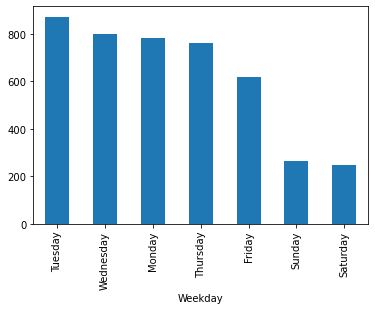

In [70]:
desktop_traffic.groupby('Weekday').mean()['Total Visitors'].sort_values(ascending=False)\
.plot(kind='bar')

Dengan cara visualisasi seperti ini, pembaca akan dimudahkan untuk mendapatkan insight dari suatu data.

Jika Anda perhatikan, method `.plot()` memiliki parameter `kind` yang membantu Anda untuk memilih jenis plot yang akan digunakan untuk melakukan visualisasi. Jenis-jenis plot yang didukung oleh method ini berdasarkan informasi pada official pagenya adalah sebagai berikut :

__kind : str__

- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : boxplot
- `kde` : Kernel Density Estimation plot
- `density` : sama seperti ‘kde’
- `area` : area plot
- `pie` : pie plot
- `scatter` : scatter plot
- `hexbin` : hexbin plot

### Knowledge Check

Pada objek `desktop_traffic` Anda memiliki variabel `Visitors Growth` yang menunjukkan pertumbuhan pengunjung website. Dengan menggunakan method `.plot()`, bagaimana cara Anda memvisualiasikan pertumbuhan pengunjung website per harinya? (Note: Urutkan visualisasi dari hari Monday-Sunday)

Ekspektasi output:
<img src="assets/weekday_growth.PNG" width=400>

<!--

Reference answer :

```python
# mendapatkan informasi rata-rata visitors growth per hari
df = desktop_traffic.groupby('Weekday').mean()['Visitors Growth']

# mengurutkan rata-rata visitors growth dari hari Monday-Sunday
df = df.sort_values(ascending=False)

# memvisualisasikan menggunakan bar plot
df.plot(kind = 'bar')
```

-->

In [77]:
## Code Here

##

## Task

Import data `turnover_balance.csv` yang tersimpan dalam folder "data_input" dan simpanlah kedalam objek `turnover`.

In [79]:
turnover = pd.read_csv('data_input/turnover_balance.csv')
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,division,salary,left
0,0.82,0.68,3,140,2,0,0,sales,low,0
1,0.79,0.67,5,156,2,0,0,product_mng,low,0
2,0.73,0.95,3,149,2,0,0,support,low,0
3,0.92,0.78,3,218,3,0,0,technical,low,0
4,0.69,1.00,5,237,3,0,0,technical,high,0


Berdasarkan data `turnover` diatas, berikut ini adalah deskripsi dari setiap variabelnya :

- `satisfaction_level` : tingkat kepuasan karyawan bekerja di suatu perusahaan
- `last_evaluation` : tingkat kepuasan karyawan pada evaluasi terakhir
- `number_project` : banyaknya project yang telah diterima karyawan
- `average_monthly_hours` : rata-rata jam kerja per bulan
- `time_spend_company` : lama waktu bekerja dalam perusahaan (tahun)
- `Work_accident` : ada tidaknya kecelakaan kerja, 0 = tidak ada, 1 = ada
- `promotion_last_5years` : pernah mendapatkan promoksi dalam 5 tahun terakhir, 0 = tidak, 1 = ya
- `division` : nama departemen atau divisi
- `salary` : tingkat pendapatan, dibagi menjadi low, medium dan high
- `left` : data history karyawan resign, 0 = tidak, 1 = ya

In [23]:
turnover.shape

(7142, 10)

In [39]:
turnover.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
division                  object
salary                    object
left                       int64
dtype: object

### Pre-processing data

Dari data turnover di atas, lakukan preprocessing data dengan:

___

1. Kolom manakah yang belum sesuai tipe datanya?

> Hint : terdapat 5 kolom yang belum sesuai tipe datanya

___


In [ ]:
# your code here



2. Ubahlah setiap kolom yang belum tepat tipe datanya kedalam tipe data yang sesuai.

<!--

Reference answer : Kolom yang belum sesuai tipe datanya adalah :

- `Work_accident` : int64 -> category
- `promotion_last_5years` : int64 -> category
- `division` : object -> category
- `salary` : object -> category
- `lef` : int64 -> category

-->

___


In [ ]:
# your code here


### Exploratory Data Analysis

Misalnya Anda berperan sebagai HR pada suatu perusahaan yang ingin menganalisis data karyawan yang Anda miliki.

---

1. Berapakah rata-rata `satisfaction_level` yang diberikan pada divisi sales?

    - [ ] 0.553801
    - [ ] 0.522670
    - [ ] 0.54
    - [ ] 0.585385

<!--
Reference answer :

```python
# preproces data
turnover[['Work_accident', 'promotion_last_5years', 'division', 'salary', 'left']] = \
turnover[['Work_accident', 'promotion_last_5years', 'division', 'salary', 'left']].astype('category')

# aggregasi data
turnover.groupby('division').agg({
    'satisfaction_level' : 'mean'
})
```

Jadi rata-rata `satisfaction_level` yang diberikan pada divisi sales adalah **0.553801**
-->

---



In [ ]:
# your code here


2. Berdasarkan informasi pada pertanyaan diatas, divisi apakah yang memiliki rata-rata `satisfaction_level` terendah? 

    - [ ] hr
    - [ ] technical
    - [ ] RandD
    - [ ] accounting

<!--
Reference answer :

```python
turnover.groupby('division').agg({
    'satisfaction_level' : 'mean'
}).sort_values('satisfaction_level', ascending = True)
```

Jadi divisi yang memberikan rata-rata `satisfaction_level` terendah adalah divisi **accounting**
-->


---



In [1]:
# your code here


3. Divisi manakah yang tergolong memiliki total salary rendah paling tinggi?

    - [ ] IT
    - [ ] sales
    - [ ] technical
    - [ ] IT

<!--
Reference answer :

```python
turnover.groupby(['division', 'salary']).agg({
    'salary' : 'count'
}).unstack()['salary'].sort_values('low', ascending = False)
```

Jadi divisi yang tergolong memiliki total salary rendah paling tinggi adalah **sales**
-->

---



In [ ]:
# your code here


4. Divisi manakah yang memiliki rata-rata `average_montly_hours` tertinggi berdasarkan status `left` = 1 ?

    - [ ] IT
    - [ ] technical
    - [ ] sales
    - [ ] hr

<!--
Reference answer :

```python
turnover[turnover['left'] == 1].groupby('division').agg({
   'average_montly_hours' : 'mean'
}).sort_values('average_montly_hours', ascending = False)
```

Jadi divisi yang memiliki rata-rata `average_montly_hours` tertinggi berdasarkan status `left` = 1 adalah **technical**
-->

---



In [ ]:
# your code here


5. Divisi apakah yang paling banyak memiliki historycal status `left` = 1 ?

    - [ ] IT
    - [ ] technical
    - [ ] sales
    - [ ] hr

<!--
Reference answer :

```python
turnover.groupby(['division', 'left']).agg({
   'left' : 'count'
}).unstack()['left'].sort_values(by = 1, ascending=False)
```

Jadi divisi yang paling banyak memiliki historycal status `left` = 1 adalah **sales**
-->

---


In [ ]:
# your code here


### Visualization

1. Jika pada soal ke 2 bagian exploratory data analysis kita visualisasikan, bagaimanakah visualisasi yang tepat?

<!-- 
Reference answer :

```python
turnover.groupby('division').agg({
    'satisfaction_level' : 'mean'
}).sort_values('satisfaction_level', ascending = True).plot(kind = 'bar')
```

Menggunakan bar plot supaya dibedakan berdasarkan masing-masing divisi
-->




In [ ]:
# your code here


---

2. Simpanlah agregasi tabel pada soal ke 3 bagian exploratory data analysis diatas pada objek `df`. Visualisasikan objek `df` tersebut berdasarkan divisi yang memiliki tingkat salary terendah paling tinggi hingga divisi yang memiliki tingkat salary rendah paling rendah.

Ekspektasi output:
<img src="assets/q2.jpg" width=400>

<!-- 
Reference answer :

```python
df = turnover.groupby(['division', 'salary']).agg({
    'salary' : 'count'
}).unstack()['salary'].sort_values('low', ascending = False)

df.plot(kind = 'bar')
```
-->

---



In [ ]:
# your code here


3. Buatlah visualisasi berdasarkan hubungan `satisfaction_level` dan `last_evaluation` pada karyawan dalam divisi sales yang memiliki historycal status `left` = 1.

Ekspektasi output:
<img src="assets/q3.jpg" width=400>

<!-- 
Reference answer :

```python
turnover[(turnover['left']== 1)&(turnover['division'] == 'sales')].plot(kind = 'scatter', x = 'satisfaction_level', y = 'last_evaluation')
```
-->

---


In [2]:
# your code Here



### **Notes**

> **Reference anwer dapat Anda lihat pada setiap markdown soal**